In [31]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import re
import math

In [32]:
dataset_names = {0:'usps',\
                 1:'satimage.scale',\
                 2:'dna.scale',\
                 3:'letter.scale',\
                 4:'pendigits',\
                 5:'news20.scale',\
                 6:'sector.scale',\
                 7:'mnist.scale',\
                 8:'cifar10',\
                 9:'toy',\
                 10:'rcv1',\
                 11:'aloi.scale'\
                }

nr_classes = {'usps':10,\
              'satimage.scale':6,\
              'dna.scale':3,\
              'letter.scale':.26,\
              'pendigits':10,\
              'news20.scale':20,\
              'sector.scale':105,\
              'mnist.scale':10,\
              'cifar10':10,\
              'toy':3,\
              'rcv1':53,\
              'aloi.scale':1000\
             }

# as powers of ten
regs = {'usps':.1,\
        'satimage.scale':1,\
        'dna.scale':1,\
        'letter.scale':.1,\
        'pendigits':.01,\
        'news20.scale':.1,\
        'sector.scale':1,\
        'mnist.scale':.01,\
        'cifar10':1,\
        'toy':1,\
        'rcv1':1,\
        'aloi.scale':.01\
       }


iters = {'usps':2048,\
         'satimage.scale':64,\
         'dna.scale':1024,\
         'letter.scale':64,\
         'pendigits':8192,\
         'news20.scale':32,\
         'sector.scale':32,\
         'mnist.scale':64,\
         'cifar10':32,\
         'toy':32,\
         'rcv1':32,\
         'aloi.scale':32\
       }


In [33]:
if "original_dir" not in locals():
    original_dir = os.getcwd()
os.chdir(original_dir)
os.chdir('..')
os.getcwd()

'/home/yutongw/liblinear'

In [34]:
def get_results(FILENAME):
#     f = open(FILENAME, "r")
    from numpy import genfromtxt
    result_np = genfromtxt(FILENAME, delimiter=',')

    result_np[:,0] = result_np[:,0]/1000
    new_col =result_np[:,1] - result_np[:,2]
    new_col = new_col.reshape(len(new_col),1)
    new_col.shape

    result_np = np.append(result_np, new_col, 1)
    return result_np

In [35]:
ds = dataset_names[7]
ds

'mnist.scale'

In [36]:
def get_exp_name(ds, reg):
    return ds+'_'+ str(int(math.log10(reg)))+'.csv'
exp_name = get_exp_name(ds,10*regs[ds])
exp_name

'mnist.scale_-1.csv'

In [37]:
result_RC = get_results("results/Ours/"+exp_name)
result_Shark = get_results("results/Shark/"+exp_name)

In [38]:
colnames = ['time (sec)', 'sum of dual vars', 'norm/2', 'C*hinge risk', 'primal obj', 'dual obj']
cn = {colnames[i] : i for i in range(len(colnames))}

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


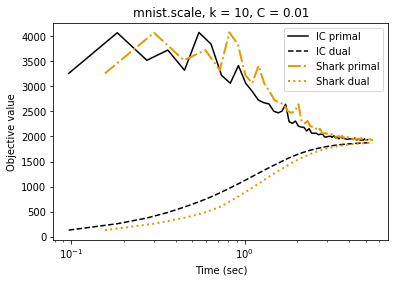

In [39]:

fig, ax = plt.subplots()
ax.semilogx(result_RC[:,cn['time (sec)']],\
            result_RC[:,cn['primal obj']],\
            linestyle='-', \
            color='k')
ax.semilogx(result_RC[:,cn['time (sec)']], \
            result_RC[:,cn['dual obj']], \
            linestyle='--', \
            color='k')

orange = (0.9,0.6,0)
ax.semilogx(result_Shark[:,cn['time (sec)']], \
            result_Shark[:,cn['primal obj']], \
            linestyle = '-.', \
            color = orange,\
            linewidth = 2)
ax.semilogx(result_Shark[:,cn['time (sec)']],\
            result_Shark[:,cn['dual obj']],\
            linestyle = ':', \
            color = orange,\
            linewidth = 2)

plt.xlabel("Time (sec)")
plt.ylabel("Objective value")
plt.title(ds + ', k = ' + str(nr_classes[ds]) +', C = ' +str(regs[ds]))
ax.legend(['IC primal','IC dual','Shark primal','Shark dual'])
plt.savefig('figures/' + ds + '_' + str(int(math.log10(regs[ds])))+'_ob.eps',format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


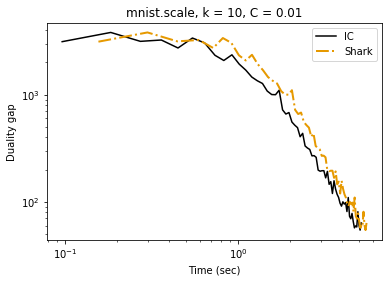

In [40]:


fig, ax = plt.subplots()
ax.loglog(result_RC[:,cn['time (sec)']],\
            result_RC[:,cn['primal obj']]-result_RC[:,cn['dual obj']] ,\
            linestyle='-', \
            color='k')

orange = (0.9,0.6,0)
ax.loglog(result_Shark[:,cn['time (sec)']], \
            result_Shark[:,cn['primal obj']]-result_Shark[:,cn['dual obj']], \
            linestyle = '-.', \
            color = orange,\
            linewidth = 2)

plt.xlabel("Time (sec)")
plt.ylabel("Duality gap")
plt.title(ds + ', k = ' + str(nr_classes[ds]) +', C = ' +str(regs[ds]))
ax.legend(['IC','Shark'])
plt.savefig('figures/'+ds+'_'+ str(int(math.log10(regs[ds])))+'_dg.eps',format='eps')